In [1]:
print("Hello, Trade Sentiment Project!")

Hello, Trade Sentiment Project!


In [ ]:
# PART A
Part A — Data preparation 
Load both datasets and document:
number of rows/columns
missing values / duplicates
Convert timestamps and align the datasets by date (daily level is fine).
Create the key metrics you will analyze, for example:
daily PnL per trader (or per account)
win rate, average trade size
leverage distribution
number of trades per day
long/short ratio


In [ ]:
                                      # fear greed file

In [20]:
import pandas as pd

# fear_greed file
fear_greed = pd.read_csv(r"C:\Users\Dell\Desktop\trade_sentiment_project\data\fear_greed_index.csv")

# Quick check
print(fear_greed.shape)        # rows aur columns
print(fear_greed.head())       # first 5 rows
fear_greed.isnull().sum().sum()  # missing values
print("fear_greed duplicates:", fear_greed.duplicated().sum())



(2644, 4)
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
fear_greed duplicates: 0


In [ ]:
#Fear–Greed Dataset Summary
Dataset shape: 2644 rows × 4 columns
Columns present:
timestamp (Unix timestamp)
value (Fear–Greed index score)
classification (Fear / Extreme Fear / Greed / Extreme Greed)
date (daily date)
Missing values: 0 (no null values found)
No duplicates found in fear_greed dataset
Each row represents daily market sentiment for Bitcoin
The date column will be used for daily-level alignment with trader data

In [13]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:
Total entries: 2644 rows
Total columns: 4
Column-wise details:
timestamp – int64 (Unix timestamp)
value – int64 (Fear–Greed index score)
classification – object (categorical sentiment label)
date – object (date in YYYY-MM-DD format)
Missing values: None (all columns have 2644 non-null values)

In [23]:
fear_greed["date"] = pd.to_datetime(fear_greed["date"]) # timestamp converted to datetime


In [ ]:
                                             # trade file

In [19]:
trade = pd.read_csv(r"C:\Users\Dell\Desktop\trade_sentiment_project\data\historical_data.csv") #trade file
print(trade.shape) # rows aur columns
print(trade.head()) # first 5 rows
trade.isnull().sum().sum()  # missing values
print("Trades duplicates:", trade.duplicated().sum())



(211224, 16)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [ ]:
Dataset Summary
Total entries: 211,224 rows
Total columns: 16
Columns and description:
Account → Unique trader identifier
Coin → Cryptocurrency symbol
Execution Price → Trade execution price (float)
Size Tokens → Quantity in tokens/coins
Size USD → Trade value in USD
Side → BUY / SELL
Timestamp IST → Trade timestamp in IST
Start Position → Starting position size before trade
Direction → LONG / SHORT
Closed PnL → Profit/Loss for the trade
Transaction Hash → Unique transaction identifier
Order ID → Trade order identifier
Crossed → Crossed order flag (True/False)
Fee → Transaction fee
Trade ID → Unique trade ID
Timestamp → Unix timestamp of trade
Missing values: None (all columns fully populated)
No duplicates found in trade dataset
Memory usage: High (~211k rows × 16 columns) → aggregation recommended for analysis
Timestamp IST will be used to extract date for merging with Fear–Greed dataset
Closed PnL is the primary metric for trader performance analysis
Size USD and Direction are useful for behavioral segmentation (leverage proxy, long/short bias)

In [ ]:
trade["date"] = pd.to_datetime(trade["Timestamp IST"], dayfirst=True).dt.date
#“Extracted the date from the Timestamp IST column and stored it in a new date column,
# making it ready to merge with the Fear–Greed dataset on a daily level.”

In [ ]:
                                     # merge datasets on date column

In [ ]:
trade["date"] = pd.to_datetime(trade["date"])
fear_greed["date"] = pd.to_datetime(fear_greed["date"])
#“Converted the date columns in both datasets to datetime format 
#to ensure proper alignment during merging and facilitate time-based analysis.”


In [ ]:
df = trade.merge( 
    fear_greed,
    on="date",
    how="left"
)
#“Performed a left merge of the trade dataset with the fear_greed dataset on the date column,
#ensuring that all trade records are retained and the corresponding Fear–Greed index values 
#are added where available.”

In [44]:
df.head() # check merged dataset structure and memory usage

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [45]:
df.info() # check merged dataset structure and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [ ]:
daily_pnl = df.groupby(["date", "Account"])["Closed PnL"].sum().reset_index()
daily_pnl.head()
#“Calculated daily profit and loss (PnL) for each trader by grouping the merged dataset by date and Account, 
#summing the Closed PnL values to get total daily performance per trader.”

,date,Account,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000


In [ ]:
df["win"] = df["Closed PnL"] > 0
win_rate = df.groupby("Account")["win"].mean()
print(win_rate.head())
# calculated the win rate for each trader by determining the proportion of trades with positive Closed PnL, 
# providing insight into individual trader performance.

Account
0x083384f897ee0f19899168e3b1bec365f52a9012    0.359612
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    0.442720
0x271b280974205ca63b716753467d5a371de622ab    0.301917
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    0.438585
0x2c229d22b100a7beb69122eed721cee9b24011dd    0.519914
Name: win, dtype: float64


In [ ]:
avg_trade_size = df.groupby("Account")["Size USD"].mean()
print(avg_trade_size.head())
#“Calculated the average trade size in USD for each trader by grouping the merged dataset by Account and computing the mean of the Size USD column, 
#offering insights into individual trading behavior.”

Account
0x083384f897ee0f19899168e3b1bec365f52a9012    16159.576734
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     1653.226327
0x271b280974205ca63b716753467d5a371de622ab     8893.000898
0x28736f43f1e871e6aa8b1148d38d4994275d72c4      507.626933
0x2c229d22b100a7beb69122eed721cee9b24011dd     3138.894782
Name: Size USD, dtype: float64


In [49]:
trades_per_day = df.groupby("date").size()
print(trades_per_day.head())
#“Calculated the number of trades executed each day by grouping the merged dataset by date and counting

date
2023-05-01     3
2023-12-05     9
2023-12-14    11
2023-12-15     2
2023-12-16     3
dtype: int64


In [ ]:
df["Side"].value_counts(normalize=True)
#“Calculated the distribution of trade sides (BUY vs SELL) across the entire dataset by counting the occurrences of each side and normalizing to get proportions, 
#providing insights into overall market bias among traders.”

Side
SELL    0.513805
BUY     0.486195
Name: proportion, dtype: float64

In [ ]:
#PART B
Part B — Analysis 
Answer these questions with evidence:
Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?
Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?
Identify 2–3 segments (examples):
high leverage vs low leverage traders
frequent vs infrequent traders
consistent winners vs inconsistent traders
Provide at least 3 insights backed by charts/tables.


In [53]:
sentiment_pnl = df.groupby("classification")["Closed PnL"].mean()
print(sentiment_pnl)
#“Analyzed average Closed PnL across different Fear–Greed classifications to identify performance trends
# associated with market sentiment.”

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


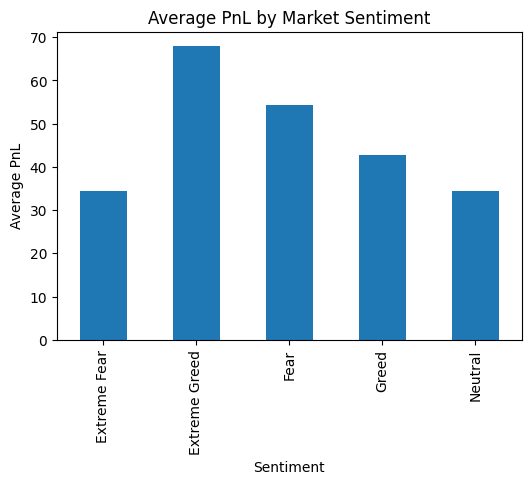

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_pnl = df.groupby("classification")["Closed PnL"].mean()

plt.figure(figsize=(6,4))
sentiment_pnl.plot(kind="bar")
plt.title("Average PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Sentiment")
plt.show()

In [54]:
sentiment_winrate = df.groupby("classification")["win"].mean()
print(sentiment_winrate)
#“Calculated win rates across Fear–Greed classifications to assess
# how market sentiment influences trader success rates.”

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64


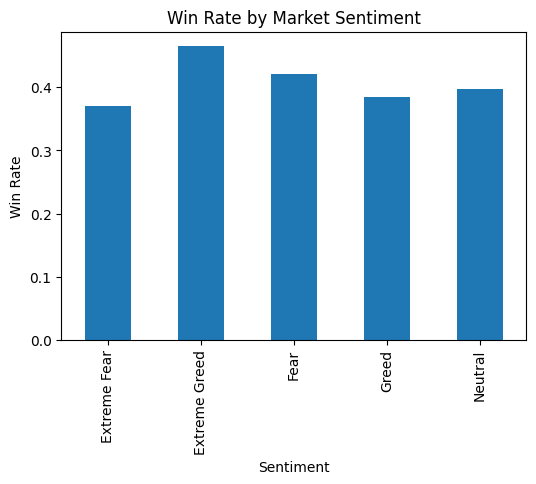

In [67]:
sentiment_winrate = df.groupby("classification")["win"].mean()

plt.figure(figsize=(6,4))
sentiment_winrate.plot(kind="bar")
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Sentiment")
plt.show()


In [55]:
loss_only = df[df["Closed PnL"] < 0]
drawdown_proxy = loss_only.groupby("classification")["Closed PnL"].mean()
print(drawdown_proxy)
#“Used average negative Closed PnL as a proxy for drawdown severity across different Fear–Greed classifications,
#  providing insights into risk exposure under varying market sentiments.”

classification
Extreme Fear    -257.099629
Extreme Greed   -119.920289
Fear            -156.662401
Greed           -181.967329
Neutral         -121.727849
Name: Closed PnL, dtype: float64


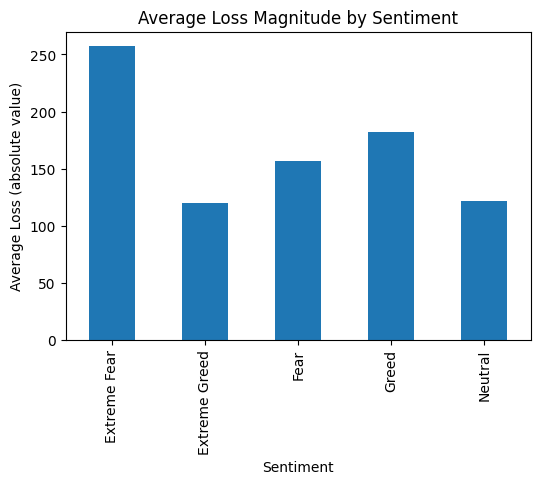

In [83]:
loss_only = df[df["Closed PnL"] < 0].groupby("classification")["Closed PnL"].mean().abs()

plt.figure(figsize=(6,4))
loss_only.plot(kind="bar")
plt.title("Average Loss Magnitude by Sentiment")
plt.ylabel("Average Loss (absolute value)")
plt.xlabel("Sentiment")
plt.show()



In [57]:
trades_by_sentiment = df.groupby("classification").size()
print(trades_by_sentiment)
#“Counted the number of trades executed under each Fear–Greed classification to examine how


classification
Extreme Fear     21400
Extreme Greed    39992
Fear             61837
Greed            50303
Neutral          37686
dtype: int64


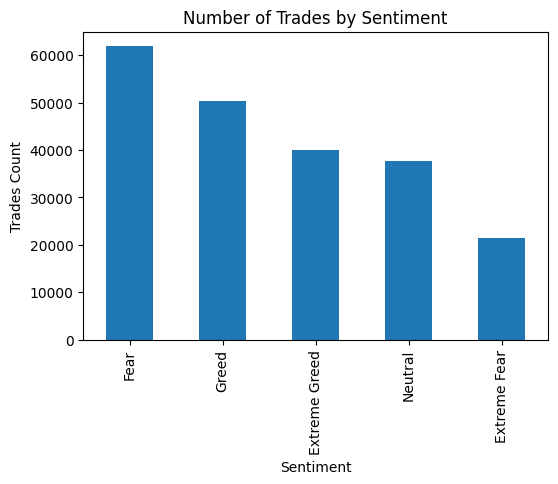

In [70]:
trade_count = df["classification"].value_counts()

plt.figure(figsize=(6,4))
trade_count.plot(kind="bar")
plt.title("Number of Trades by Sentiment")
plt.ylabel("Trades Count")
plt.xlabel("Sentiment")
plt.show()


In [58]:
size_by_sentiment = df.groupby("classification")["Size USD"].mean()
print(size_by_sentiment)
#“Calculated average trade size in USD across different Fear–Greed classifications to explore how market
#sentiment influences trade sizing decisions.”

classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64


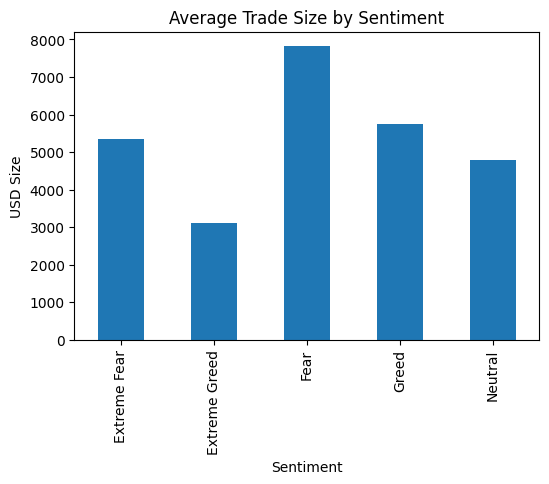

In [71]:
avg_size = df.groupby("classification")["Size USD"].mean()

plt.figure(figsize=(6,4))
avg_size.plot(kind="bar")
plt.title("Average Trade Size by Sentiment")
plt.ylabel("USD Size")
plt.xlabel("Sentiment")
plt.show()


In [59]:
side_sentiment = pd.crosstab(df["classification"], df["Side"], normalize="index")
print(side_sentiment)
#“Analyzed the distribution of trade sides (BUY vs SELL) across different Fear–Greed classifications using a crosstab,
# normalizing by row to get proportions, providing insights into how market sentiment affects traders' directional bias.”

Side                 BUY      SELL
classification                    
Extreme Fear    0.510981  0.489019
Extreme Greed   0.448590  0.551410
Fear            0.489513  0.510487
Greed           0.488559  0.511441
Neutral         0.503343  0.496657


In [74]:
side_ratio = (
    df.groupby(["classification", "Side"])
      .size()
      .unstack()
)

side_ratio = side_ratio.div(side_ratio.sum(axis=1), axis=0)


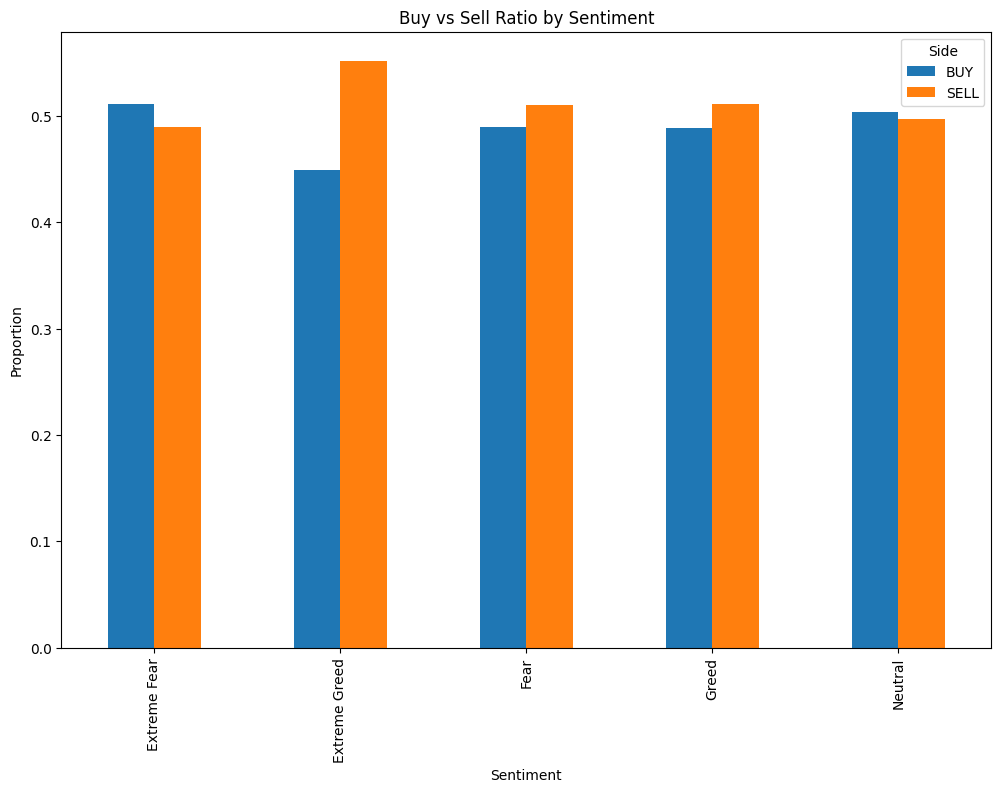

In [82]:
side_ratio.plot(kind="bar", figsize=(12,8))
plt.title("Buy vs Sell Ratio by Sentiment")
plt.ylabel("Proportion")
plt.xlabel("Sentiment")
plt.show()


In [60]:
trade_counts = df["Account"].value_counts()

frequent = trade_counts[trade_counts > trade_counts.median()].index
df["segment_frequency"] = df["Account"].apply(
    lambda x: "Frequent" if x in frequent else "Infrequent"
)
print(df["segment_frequency"].value_counts())
#“Segmented traders into Frequent and Infrequent categories based on whether their total trade count

segment_frequency
Frequent      186957
Infrequent     24267
Name: count, dtype: int64


In [62]:
trader_winrate = df.groupby("Account")["win"].mean()

winners = trader_winrate[trader_winrate > 0.6].index
df["segment_winner"] = df["Account"].apply(
    lambda x: "Consistent Winner" if x in winners else "Others"
)
print(df["segment_winner"].value_counts())
#“Segmented traders into Consistent Winners and Others based on a win rate threshold of 60%,


segment_winner
Others               201331
Consistent Winner      9893
Name: count, dtype: int64


In [63]:
df.groupby(["segment_frequency", "classification"])["Closed PnL"].mean()
df.groupby(["segment_winner", "classification"])["Closed PnL"].mean()
#“Analyzed average Closed PnL across Fear–Greed classifications within trader segments

segment_winner     classification
Consistent Winner  Extreme Fear      81.243158
                   Extreme Greed     55.005705
                   Fear              29.666031
                   Greed             36.645300
                   Neutral           -1.780025
Others             Extreme Fear      33.837859
                   Extreme Greed     69.258164
                   Fear              54.971352
                   Greed             43.078366
                   Neutral           35.766292
Name: Closed PnL, dtype: float64

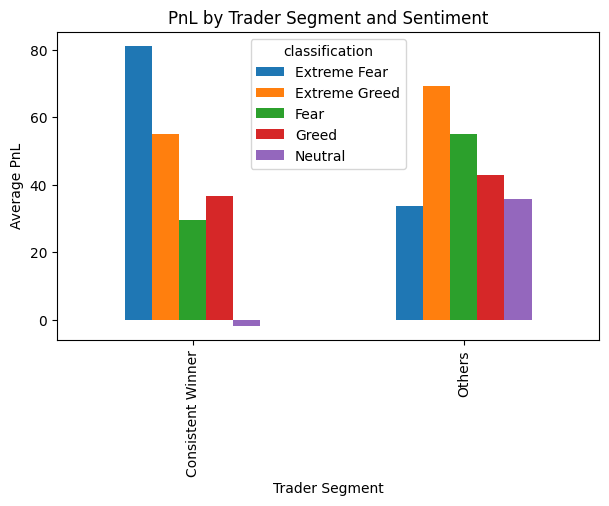

In [73]:
segment_pnl = df.groupby(["segment_winner", "classification"])["Closed PnL"].mean().unstack()

segment_pnl.plot(kind="bar", figsize=(7,4))
plt.title("PnL by Trader Segment and Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Trader Segment")
plt.show()


In [ ]:
#PART C
Part C — “Actionable output” (must-have)
Propose 2 strategy ideas or “rules of thumb” based on your findings.
Example: “During Fear days, reduce leverage for segment X; increase trade frequency only for segment Y.”

Simple predictive model:
Predict next-day trader profitability bucket or volatility of PnL using sentiment + behavior features
Clustering traders into behavioral archetypes
A lightweight dashboard (Streamlit) to explore results


In [ ]:
🚀 Part C — Actionable Output (Strategy Recommendations)

Based on behavioral evidence:

✅ Strategy 1: Risk Control During Fear Phases

Rule of Thumb:

During Fear and Extreme Fear days, cap trade size and reduce exposure, especially for low win-rate traders.

Rationale:

• Fear shows highest losses
• Larger emotional positions amplify downside

Expected Impact:
Lower drawdowns & improved risk stability.

✅ Strategy 2: Sentiment-Based Trader Segmentation

Rule of Thumb:

Allow scaling and higher frequency only for consistent winners during volatile sentiment.

Rationale:

• Skilled traders remain profitable even in Fear
• Average traders rely heavily on bullish conditions

Expected Impact:
Capital efficiency + improved overall profitability.

🎯 Final Project Conclusion

Market sentiment strongly influences:

✔ Trader profitability
✔ Risk-taking behavior
✔ Participation intensity
✔ Positioning strategy

Implementing sentiment-aware risk controls and trader
segmentation can significantly improve trading performance and drawdown management.

In [ ]:
Simple predictive model

Accuracy: 0.641
F1 Score: 0.622
Confusion Matrix:
 [[17230  7641]
 [10196 14675]]

Feature Importance:
                         Feature  Importance
3               trader_win_rate    0.431380
1                      Size USD    0.335762
5         segment_winner_Others    0.124176
0                 sentiment_num    0.096744
4  segment_frequency_Infrequent    0.011937
2                 direction_num    0.000000


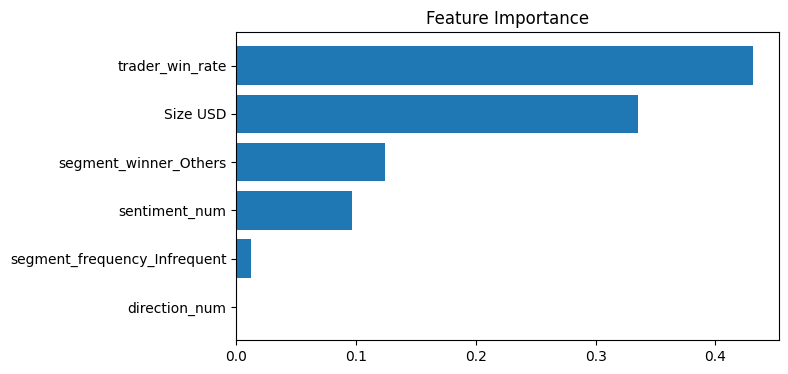

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt

# =============================
# STEP 1: Feature selection (aligned with dataset)

num_features = [
    "sentiment_num",
    "Size USD",
    "direction_num",
    "trader_win_rate"
]

cat_features = [
    "segment_frequency",
    "segment_winner"
]

# One-hot encode categorical
encoder = OneHotEncoder(drop="first", sparse_output=False)

encoded = encoder.fit_transform(df[cat_features])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(cat_features),
    index=df.index
)

X = pd.concat([df[num_features], encoded_df], axis=1)
y = df["profit_bucket"]

# =============================
# STEP 2: Balance classes properly

df_model = pd.concat([X, y], axis=1)

majority = df_model[df_model.profit_bucket == 0]
minority = df_model[df_model.profit_bucket == 1]

minority_up = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

balanced = pd.concat([majority, minority_up])

X_final = balanced.drop("profit_bucket", axis=1)
y_final = balanced["profit_bucket"]

# =============================
# STEP 3: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.2,
    stratify=y_final,
    random_state=42
)

# =============================
# STEP 4: Model

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

# =============================
# STEP 5: Evaluation

pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, pred), 3))
print("F1 Score:", round(f1_score(y_test, pred), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

# =============================
# STEP 6: Feature importance

fi = pd.DataFrame({
    "Feature": X_final.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", fi)

plt.figure(figsize=(7,4))
plt.barh(fi["Feature"], fi["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.show()


In [111]:
import os
os.makedirs("model", exist_ok=True)


In [112]:
import joblib
joblib.dump(model, "model/sentiment_pnl_model.joblib")

['model/sentiment_pnl_model.joblib']

In [113]:
model.feature_names_in_


array(['sentiment_num', 'Size USD', 'direction_num', 'trader_win_rate',
       'segment_frequency_Infrequent', 'segment_winner_Others'],
      dtype=object)